<a href="https://colab.research.google.com/github/tiwars10/Analytics/blob/master/holtwinterstimeseries_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings

In [0]:
import pandas as pd

In [0]:
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np


In [0]:
import itertools

In [0]:
import seaborn as sns

In [0]:
import scipy

In [0]:
%matplotlib inline

In [0]:
from matplotlib.pylab import rcParams

In [0]:
import statsmodels.api as sm

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
!pip install pmdarima

     |████████████████████████████████| 921kB 2.9MB/s 
     |████████████████████████████████| 24.8MB 46.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


In [0]:
import pmdarima as pm

In [0]:
from sklearn import metrics

In [0]:
from pmdarima import auto_arima

In [0]:
warnings.filterwarnings('ignore')

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [0]:
flight_data=sns.load_dataset("flights")

In [0]:
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flight_data.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [0]:
flight_data.shape

(144, 3)

In [0]:
flight_data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [0]:
flight_data.info

<bound method DataFrame.info of      year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951  

Create Pivot Table using Pandas Pivot Table method

In [0]:
flight_data_pivot=flight_data.pivot('month','year','passengers')

In [0]:
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [0]:
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

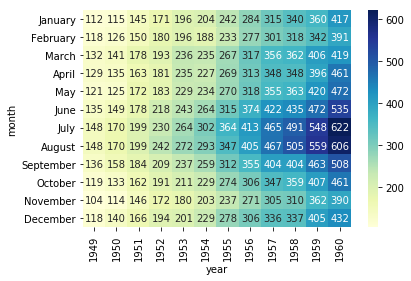

In [0]:
sns.heatmap(flight_data_pivot,annot=True,fmt="d",cmap="YlGnBu")

In [0]:
plt.show()

In [0]:
month=pd.date_range('19490131',periods=144,freq='M')

In [0]:
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [0]:
flight_data['datestamp']=month

In [0]:
flight_data.head()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


In [0]:
data=flight_data.loc[:,('datestamp','passengers')]

In [0]:
data.head()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
data.tail()

,datestamp,passengers
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390
143,1960-12-31,432


In [0]:
data.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [0]:
 train,test=data[:132],data[132:]
 train.shape
test.shape

(132, 2)

(12, 2)

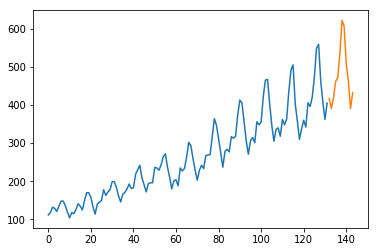

In [0]:
plt.plot(train.passengers)
plt.plot(test.passengers)
plt.show();

In [0]:
model=ExponentialSmoothing(train.passengers,trend='add',seasonal='mul',seasonal_periods=12).fit()

In [0]:
model.params

{'damping_slope': nan,
 'initial_level': 225.81804357806502,
 'initial_seasons': array([0.51871446, 0.5409136 , 0.59214149, 0.56607664, 0.52397274,
        0.58345929, 0.64285097, 0.64082501, 0.58669635, 0.51036401,
        0.45068799, 0.52656335]),
 'initial_slope': 1.083614668909484,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.3157894736842105,
 'smoothing_seasonal': 0.6842105263157894,
 'smoothing_slope': 0.05263132126763647,
 'use_boxcox': False}

In [0]:
predicted=model.predict(132,143)

In [0]:
test.head()

,datestamp,passengers
132,1960-01-31,417
133,1960-02-29,391
134,1960-03-31,419
135,1960-04-30,461
136,1960-05-31,472


In [0]:
predicted

132    416.880499
133    394.081804
134    463.146184
135    449.154364
136    473.079572
137    540.229247
138    627.202264
139    638.522300
140    524.253163
141    458.972684
142    403.736056
143    431.783773
dtype: float64

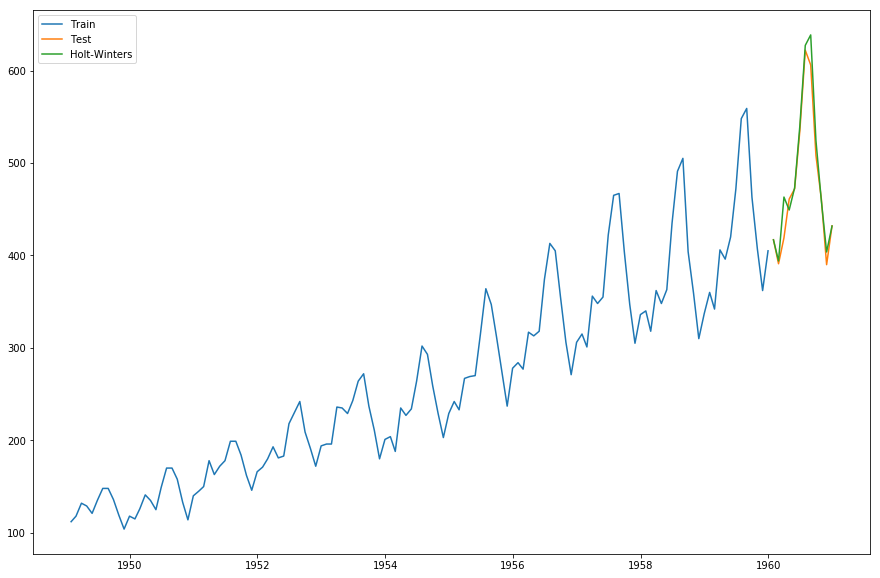

In [0]:
plt.figure(figsize=(15,10))
plt.plot(train.datestamp,train.passengers,label='Train')
plt.plot(test.datestamp,test.passengers,label='Test')
plt.plot(test.datestamp,predicted,label='Holt-Winters')
plt.legend(loc='best')
plt.show();

In [0]:
test['Predicted_Passengers']=predicted
test['Error']=test['passengers']-test['Predicted_Passengers']
test

,datestamp,passengers,Predicted_Passengers,Error
132,1960-01-31,417,416.880499,0.119501
133,1960-02-29,391,394.081804,-3.081804
134,1960-03-31,419,463.146184,-44.146184
135,1960-04-30,461,449.154364,11.845636
136,1960-05-31,472,473.079572,-1.079572
137,1960-06-30,535,540.229247,-5.229247
138,1960-07-31,622,627.202264,-5.202264
139,1960-08-31,606,638.522300,-32.522300
140,1960-09-30,508,524.253163,-16.253163
141,1960-10-31,461,458.972684,2.027316


In [0]:
metrics.mean_absolute_error(test.passengers,test.Predicted_Passengers)

11.288272583732882

In [0]:
metrics.mean_squared_error(test.passengers,test.Predicted_Passengers)

305.7493164913802

In [0]:
metrics.median_absolute_error(test.passengers,test.Predicted_Passengers)

5.2157555631613945

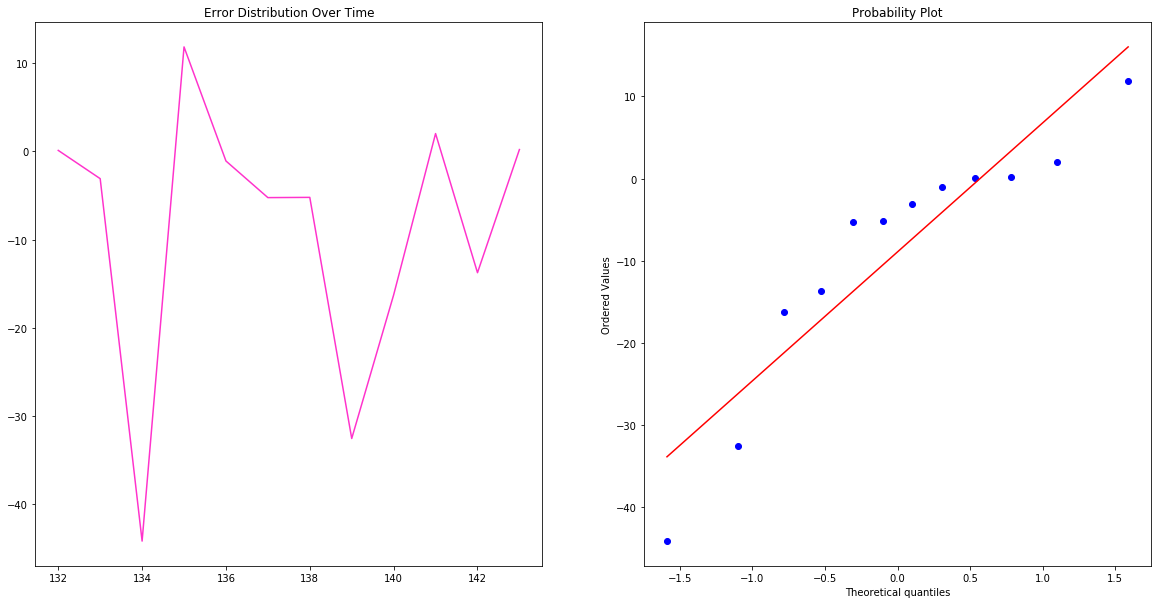

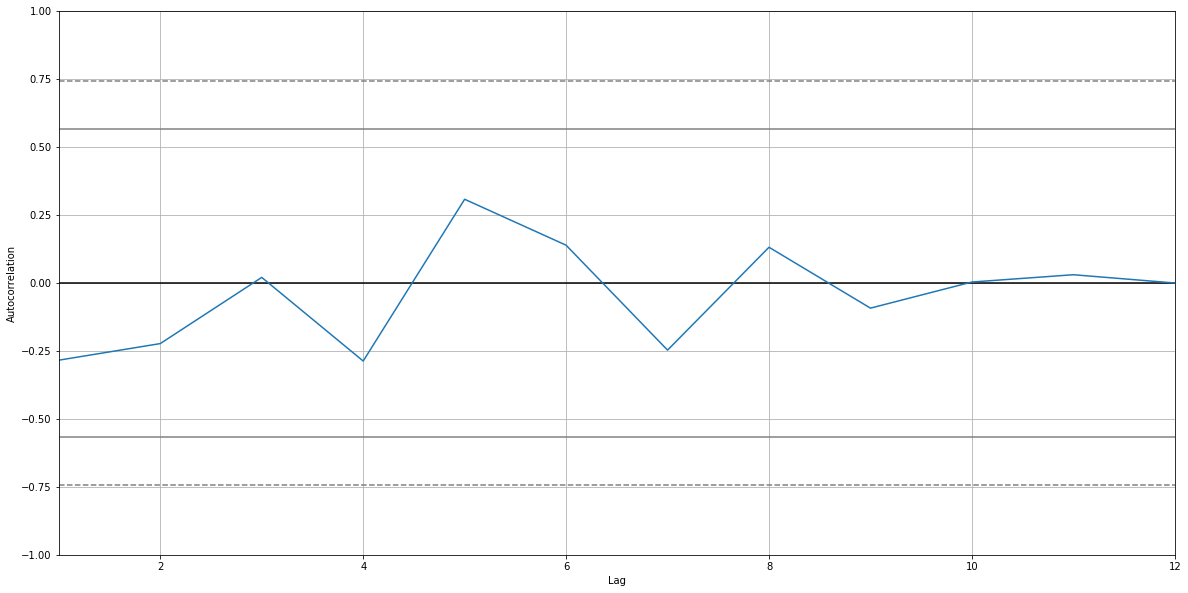

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error,color='#ff33cc')
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test.Error,plot=plt)
plt.show();

plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show();